Data That will be missing
1. Continuous(age, salery)
2. categorical(gender, )

#### What kind of data is missing?
1. Missing completly at rendom, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2. Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.
#### Missing At Random(MAR)
1. Men---hide their salary
2. Women---hide their age


### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df['cabin_nan'] = np.where(df['Cabin'].isnull(), 1, 0)

In [7]:
np.mean(df['cabin_nan'])

0.7822966507177034

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_nan'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_nan'].mean()

Survived
0    0.823308
1    0.710526
Name: cabin_nan, dtype: float64

### 1. Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [19]:
df=pd.read_csv('tested.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [20]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [21]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [22]:
median=df.Age.median()
median

27.0

In [23]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0


In [24]:
print(df['Age'].std())
print(df['Age_median'].std())

14.181209235624422
12.70376984633328


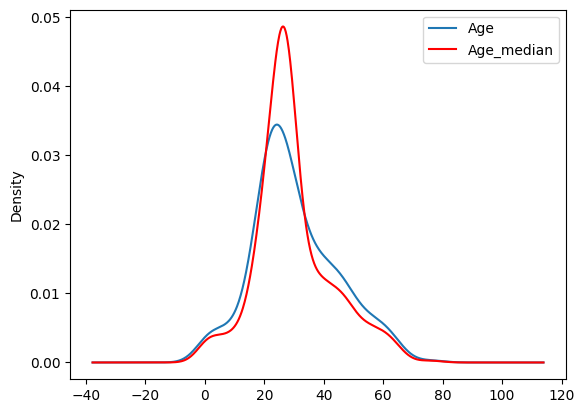

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation
## Advantages
1. Easy to implement(Robust to outliers)
2. aster way to obtain the complete dataset

## Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

### Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('tested.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [6]:
def impute_nan(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_random"] = df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [7]:
median=df.Age.median()


In [8]:
impute_nan(df,"Age",median)


In [9]:
df.head()


,Survived,Age,Fare,Age_median,Age_random
0,0,34.5,7.8292,34.5,34.5
1,1,47.0,7.0000,47.0,47.0
2,0,62.0,9.6875,62.0,62.0
3,0,27.0,8.6625,27.0,27.0
4,1,22.0,12.2875,22.0,22.0


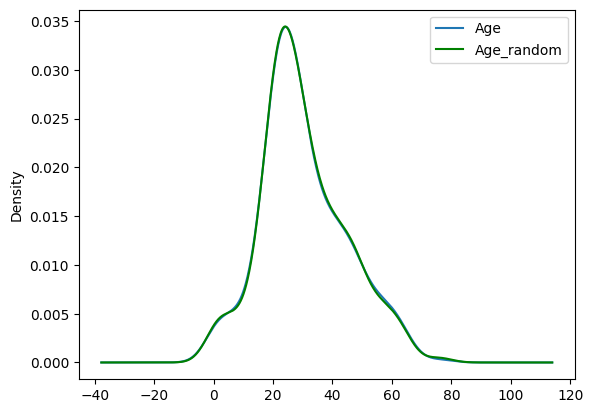

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

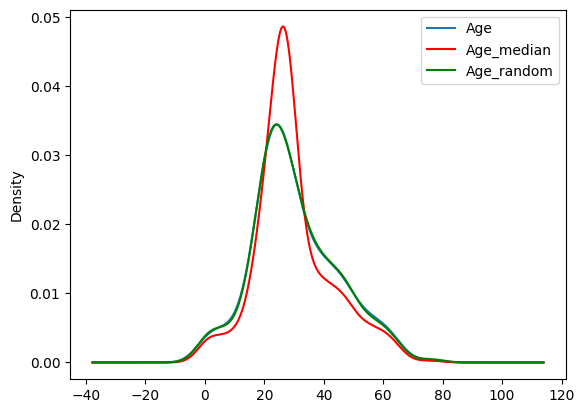

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
1. Easy To implement
2. here is less distortion in variance
### Disadvantage
1. Every situation randomness wont work

### Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [8]:
import pandas as pd
df=pd.read_csv('tested.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [9]:
df['Age_nan'] = np.where(df['Age'].isnull(), 1, 0)

In [10]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,34.5,7.8292,0
1,1,47.0,7.0000,0
2,0,62.0,9.6875,0
3,0,27.0,8.6625,0
4,1,22.0,12.2875,0


In [16]:
df.Age.median()

27.0

In [11]:
df.Age.fillna(df.Age.median(), inplace=True)

In [15]:
df.sample(10)

,Survived,Age,Fare,Age_nan
130,0,32.0,8.0500,0
139,0,40.0,46.9000,0
9,0,21.0,24.1500,0
400,1,30.0,164.8667,0
89,0,2.0,23.0000,0
324,1,39.0,211.3375,0
339,0,27.0,7.2292,1
120,1,12.0,15.7500,0
91,0,27.0,7.7750,1
387,0,57.0,13.0000,0


### Advantages
1. Easy to implement
2. Captures the importance of missing values
### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation

Captures the importance of missing values, 

In [18]:
df=pd.read_csv('tested.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


<Axes: >

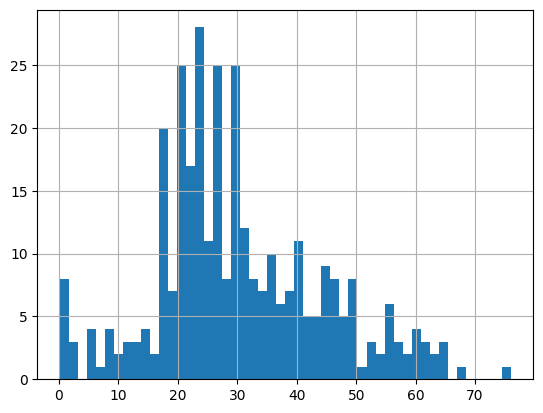

In [20]:
df.Age.hist(bins= 50)

In [36]:
df.Age.median()

27.0

In [30]:
#value after 3rd standard daviation
extream = df.Age.mean()+3*df.Age.std()

<Axes: xlabel='Age'>

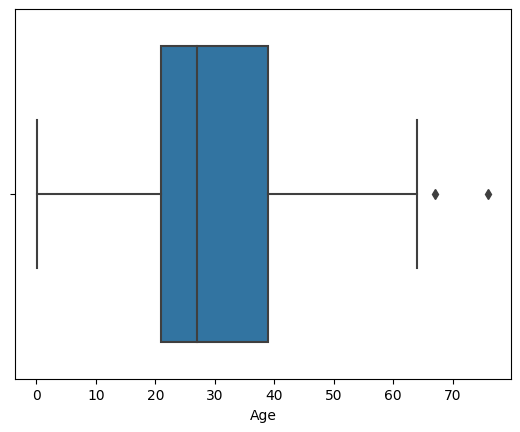

In [29]:
sns.boxplot(x = 'Age', data = df)

In [31]:
def impute_nan(df, variable, median, extream):
    df[variable+'_end_dis'] = df[variable].fillna(extream)
    df[variable+'_median'] = df[variable].fillna(median)

In [33]:
impute_nan(df, 'Age', df.Age.median(), extream)

In [35]:
df.sample(10)

,Survived,Age,Fare,Age_end_dis,Age_median
356,1,59.0,51.4792,59.000000,59.0
262,1,29.0,23.0000,29.000000,29.0
322,0,26.0,13.0000,26.000000,26.0
19,1,45.0,7.2250,45.000000,45.0
200,1,NaN,15.5000,72.816218,27.0
31,0,24.0,31.5000,24.000000,24.0
83,0,NaN,7.8958,72.816218,27.0
251,0,20.0,7.9250,20.000000,20.0
103,0,26.0,7.7750,26.000000,26.0
409,1,3.0,13.7750,3.000000,3.0


<Axes: >

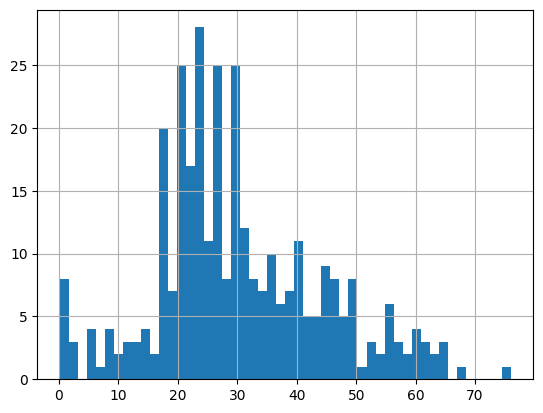

In [37]:
df.Age.hist(bins= 50)

<Axes: >

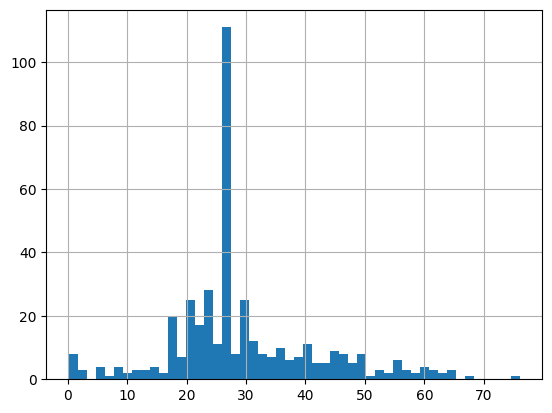

In [38]:
df.Age_median.hist(bins= 50)

<Axes: >

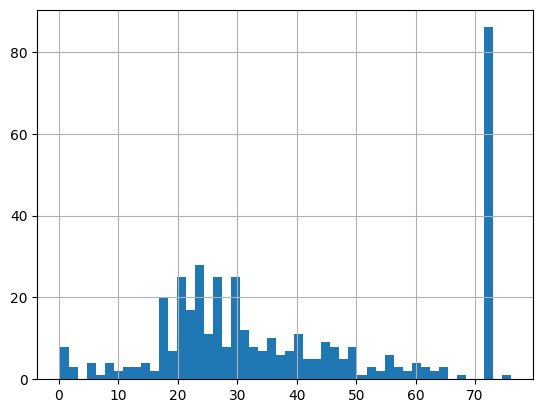

In [39]:
df.Age_end_dis.hist(bins= 50)

<Axes: xlabel='Age_end_dis'>

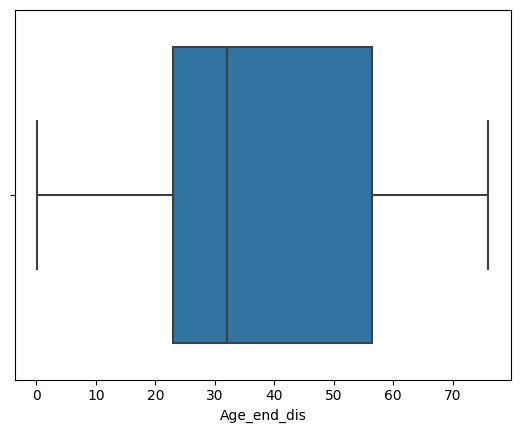

In [52]:
sns.boxplot(x = 'Age_end_dis', data = df)

### Advantages
1. Easy to implement
2. Captures the importance of missing values
### Disadvantages
1. Distort the original distribution of the data
2. If missingness is not important, it may mask the predictive power of the original data by distorting its distribution
3. If the NA values are big it may mask true outliar in distribution
4. If the number of NA is small, replaced NA will be considerd as outliar and preprocessed in a subsequent distribution

### Arbitrary Value Imputation
this technique was derived from kaggle competition. It consists of replacing NAN by an arbitrary value

In [53]:
df=pd.read_csv('tested.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [54]:
def impute_nan(df, variable):
    df[variable + '_hundred'] = df[variable].fillna(100)
    df[variable + '_zeros'] = df[variable].fillna(0)

In [57]:
impute_nan(df, "Age")

In [58]:
df.head()

,Survived,Age,Fare,Age_hundred,Age_zeros
0,0,34.5,7.8292,34.5,34.5
1,1,47.0,7.0000,47.0,47.0
2,0,62.0,9.6875,62.0,62.0
3,0,27.0,8.6625,27.0,27.0
4,1,22.0,12.2875,22.0,22.0


<Axes: >

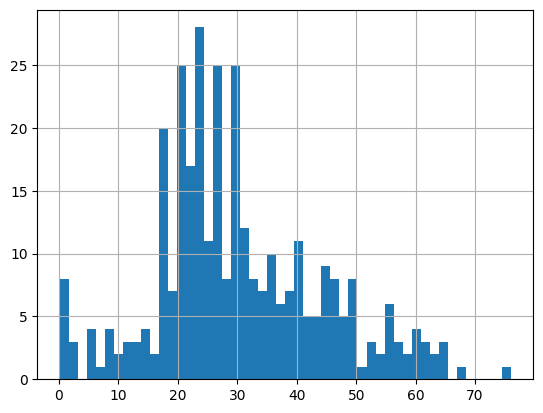

In [59]:
df.Age.hist(bins=50)

<Axes: >

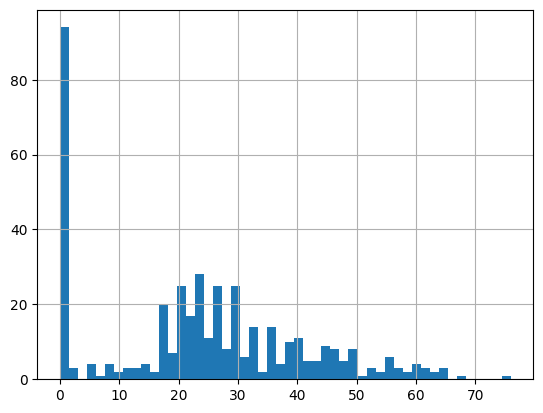

In [60]:
df.Age_zeros.hist(bins=50)

<Axes: >

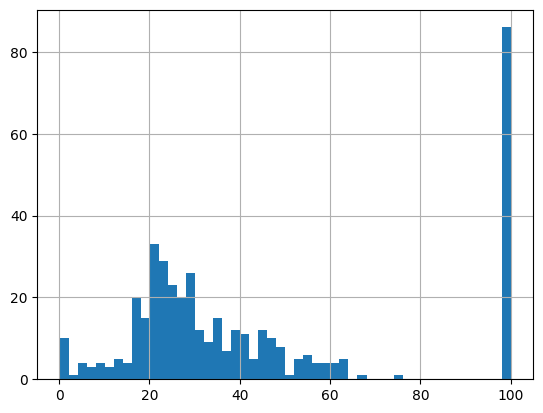

In [61]:
df.Age_hundred.hist(bins=50)

### Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one
### Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
4. Hard to decide which value to use